# Showcasing the results
1. Estimation performance
2. Hypothesis testing performance

In [25]:
%load_ext autoreload
%autoreload 2
%load_ext lab_black

import matplotlib.pyplot as plt
import numpy as np
import json
import pandas as pd
import seaborn as sns
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [26]:
# f_name = "out/estimate/hsq-0.25-pcausal-0.01-cor-1.0-hermodel-mafukb.estimate.json"

# with open(f_name) as f:
#     data = json.load(f)

#     df_plot = pd.DataFrame(
#         np.array([d["estimate"] for d in data]),
#         columns=[
#             "estimated_var_g",
#             "estimated_rho",
#             "estimated_var_e",
#         ],
#     )
# df_plot["estimated_ratio"] = df_plot["estimated_rho"] / df_plot["estimated_var_g"]

In [27]:
rls_list = []

for hsq in [0.1, 0.25, 0.5]:
    for pcausal in [0.01, 0.001, 1.0]:
        for cor in [0.6, 0.8, 1.0]:
            # for hsq in [0.1]:
            #     for pcausal in [0.01, 0.001, 1.0]:
            #         for cor in [0.8, 1.0]:
            for hermodel in ["mafukb"]:
                f_name = (
                    f"out/estimate/hsq-{hsq}-pcausal-{pcausal}-cor-{cor}"
                    + f"-hermodel-{hermodel}.estimate.json"
                )
                if not os.path.exists(f_name):
                    continue
                with open(f_name) as f:
                    data = json.load(f)

                    df_tmp = pd.DataFrame(
                        np.array([d["estimate"] for d in data]),
                        columns=[
                            "estimated_var_g",
                            "estimated_rho",
                            "estimated_var_e",
                        ],
                    )
                    df_tmp["hsq"] = hsq
                    df_tmp["cor"] = cor
                    df_tmp["pcausal"] = pcausal
                    df_tmp["hermodel"] = hermodel
                    rls_list.append(df_tmp)

df_plot = pd.concat(rls_list)
df_plot["estimated_ratio"] = df_plot["estimated_rho"] / df_plot["estimated_var_g"]

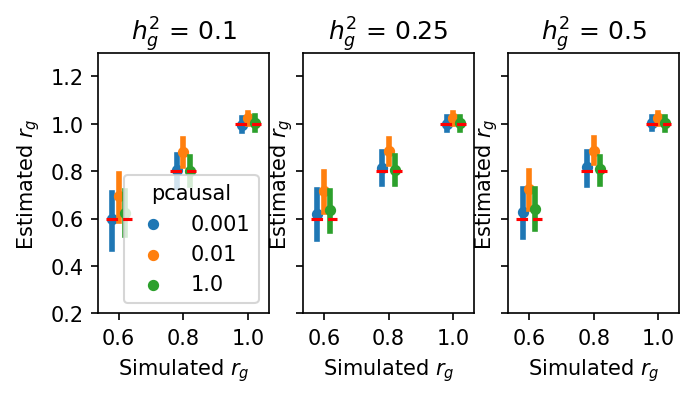

In [28]:
fig, axes = plt.subplots(figsize=(5, 2.3), dpi=150, sharex=True, sharey=True, ncols=3)

for ax_i, hsq in enumerate([0.1, 0.25, 0.5]):
    df_tmp = df_plot[(df_plot.hsq == hsq)].copy()

    ax = axes[ax_i]

    sns.pointplot(
        data=df_tmp,
        x="cor",
        y="estimated_ratio",
        hue="pcausal",
        dodge=0.2,
        join=False,
        ax=ax,
        markers=".",
    )
    cor_list = sorted(df_plot.cor.unique())

    ax.hlines(
        cor_list,
        np.arange(len(cor_list)) - 0.2,
        np.arange(len(cor_list)) + 0.2,
        color="red",
        ls="--",
        zorder=10,
    )
    ax.set_ylim(0.2, 1.3)
    ax.set_xlabel("Simulated $r_g$")
    ax.set_ylabel("Estimated $r_g$")
    ax.set_title("$h_g^2$" + f" = {hsq}")
    if ax_i != 0:
        axes[ax_i].legend([], [], frameon=False)

In [29]:
# rls_list = []

# for simulate_snpset in ["hm3", "imputed"]:
#     for estimate_snpset in ["hm3", "imputed"]:
#         for pcausal in [0.005, 0.1, 1.0]:
#             for rho in [0.5, 0.8, 1.0]:
#                 f_name = f"out/estimate/snpset-{simulate_snpset}-varg-1.0-pcausal-{pcausal}-rho-{rho}.{estimate_snpset}.estimate.json"
#                 if not os.path.exists(f_name):
#                     continue
#                 with open(f_name) as f:
#                     data = json.load(f)
#                     df_tmp = pd.DataFrame(
#                         np.array([d["estimate"] for d in data]),
#                         columns=["estimated_var_g", "estimated_rho", "estimated_var_e"],
#                     )
#                     df_tmp["simulate_snpset"] = simulate_snpset
#                     df_tmp["estimate_snpset"] = estimate_snpset
#                     df_tmp["rho"] = rho
#                     df_tmp["pcausal"] = pcausal
#                     rls_list.append(df_tmp)

# df_plot = pd.concat(rls_list)
# df_plot["estimated_ratio"] = df_plot["estimated_rho"] / df_plot["estimated_var_g"]